In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Architecture of Regression Model

(1) Input Layer Shape----------Same Shape as number of features(e.g 3 for bedrooms, bathrooms, car spacing in housing price prediction)

(2) Hidden Layers----------Problem Specific, minimum=1, maximum=unlimited

(3) Neurons per hidden layer----------Problem Specific, generally 10 to 100

(4) Output layers shape----------Same shape as desired prediction shape(e.g 1 for house price)

(5) Hidden Activation----------Usually ReLU(Rectified Linear Unit)

(6) Output Activation----------None, ReLU, logistic,tanh

(7) Loss function----------MSE(Mean Square Error) or MAE(mean absolute error)/Huber(combination of MAE/MSE) if outliers

(8) Optimizer----------SGD(stochastic gradient descent), Adam


# Introduction to Regression in Nueral Networks in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: redirecting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
print(tf.__version__)

2.14.0


# Creating data to view and fit

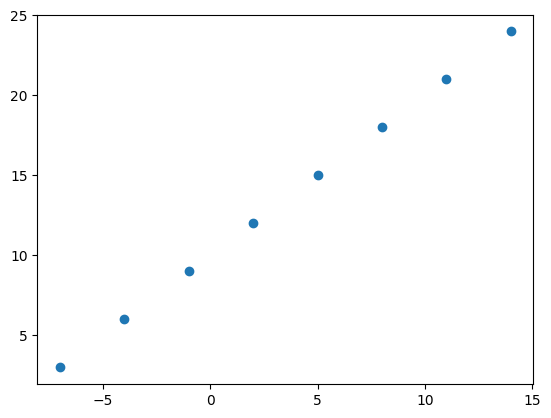

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y)

In [4]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
input_shape_0 = X[0].shape
output_shape_0 = Y[0].shape
input_shape_0, output_shape_0    # The shape becomes zero because it is scalar.

((), ())

In [8]:
X[0].ndim

0

In [9]:
# Turn our Numpy arrays into tensors

X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X.shape, Y.shape

(TensorShape([8]), TensorShape([8]))

In [10]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

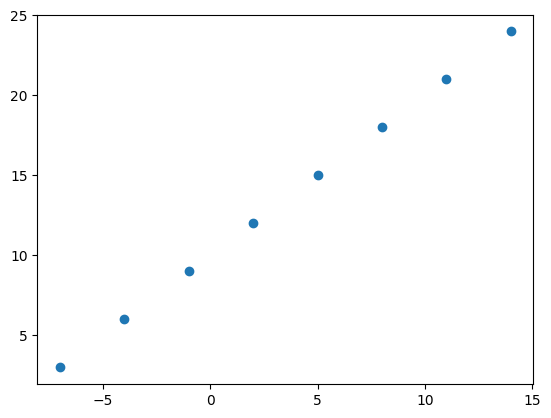

In [11]:
plt.scatter(X, Y)

# Steps in Modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function( in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between x & Y(features and labels).


In [12]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using sequential API

model = tf.keras.Sequential([  # Sequential groups a linear stack of layers into Model
    tf.keras.layers.Dense(1)  # Dense usually refers to single layer
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,  # Loss function is used to optimize our model.
    optimizer=tf.keras.optimizers.SGD(), # We can also write optimizer='sgd'
    metrics=["mae"]  # A metric is a function that is used to judge the performance of your model.
    ) # mae is short for mean absolute error
    # SGD is short for stochastic gradient descent

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5) #Epochs is total number of iterations of all the training data in one cycle for training the machine learning model.

Epoch 1/5
1/1 [==============================] - 0s 456ms/step - loss: 13.4071 - mae: 13.4071
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 13.2746 - mae: 13.2746
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 13.1421 - mae: 13.1421
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 13.0096 - mae: 13.0096
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 12.8771 - mae: 12.8771
